In [1]:
from nn_architectures import Model4_1_1, Model4_1_2, Model4_1_3
from utils import *
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Loading and Preprocessing Data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

cols_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']
X_train = train_data.drop(cols_to_drop, axis=1).iloc[:, 1:]
y_train = train_data['Survived']
X_test = test_data.drop(cols_to_drop, axis=1)
y_test = pd.read_csv('data/gender_submission.csv').drop('PassengerId', axis=1)

In [3]:
embarked_labels = X_train['Embarked'].unique().copy()
sex_labels = X_train['Sex'].unique().copy()

for x in [X_train, X_test]:
    x.dropna(inplace=True)
    x['Embarked'] = x['Embarked'].map({e: i for i, e in enumerate(embarked_labels)})
    x['Sex'] = x['Sex'].map({e: i for i, e in enumerate(sex_labels)})

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [4]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(dim=1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), shuffle=False)

# Training Model 4-1

### Model 4-1-1

Epoch 999: Batch Loss - 4.676297664642334                     

Accuracy: 0.8973
Recall: 0.8898
Precision: 0.8496
F1: 0.8692


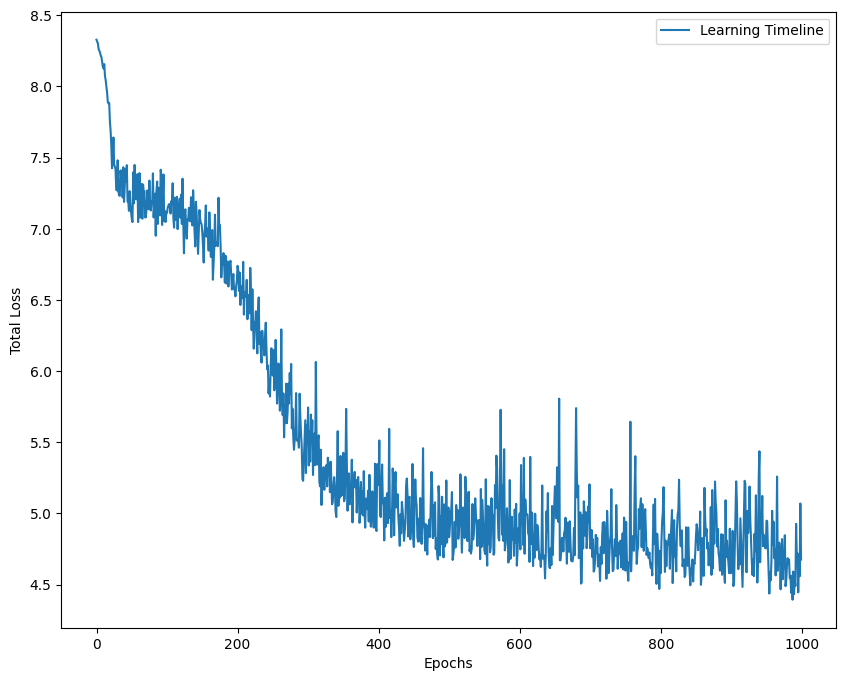

In [5]:
evaluate_model(Model4_1_1(X_train.shape[1]), train_loader, 1e-6, X_test, y_test, 1000, 'model4_1_1')

### Model 4-1-2

Epoch 999: Batch Loss - 5.0804314613342285                    

Accuracy: 0.8520
Recall: 0.8740
Precision: 0.7708
F1: 0.8192


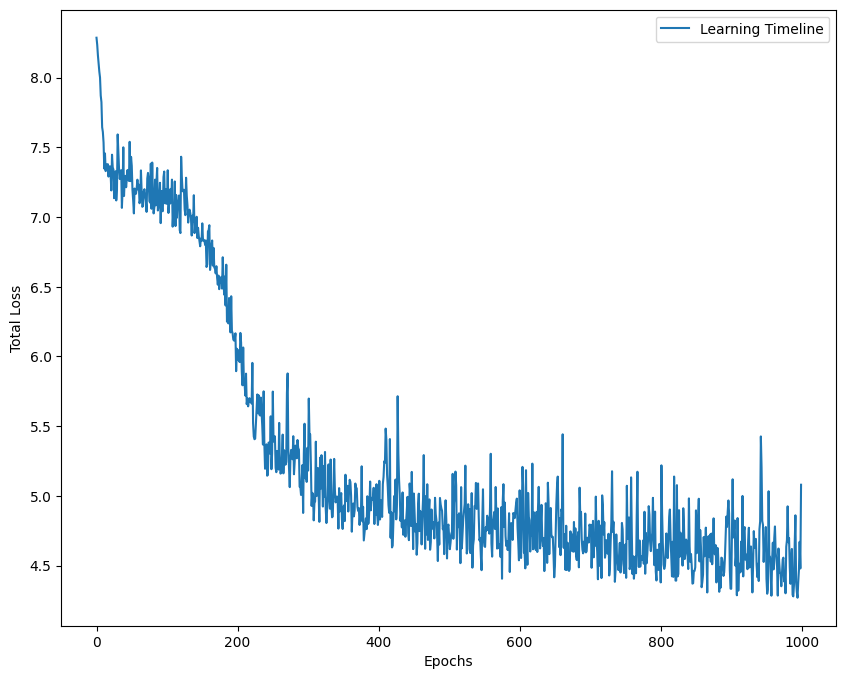

In [8]:
evaluate_model(Model4_1_2(X_train.shape[1]), train_loader, 1e-6, X_test, y_test, 1000, 'model4_1_2')

### Model 4-1-3

Epoch 999: Batch Loss - 7.374630451202393                     

Accuracy: 0.6284
Recall: 0.4724
Precision: 0.5172
F1: 0.4938


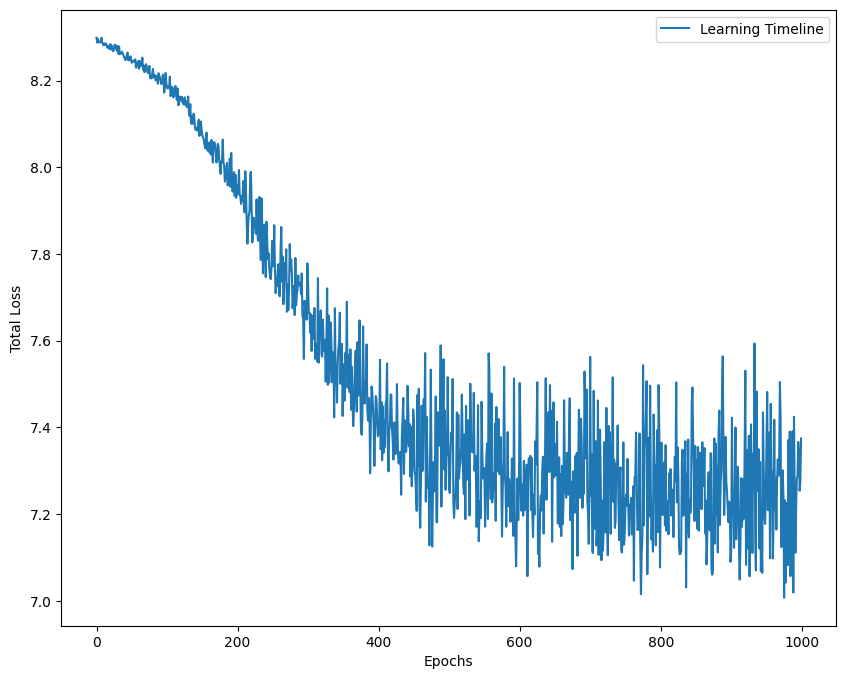

In [9]:
evaluate_model(Model4_1_3(X_train.shape[1]), train_loader, 1e-6, X_test, y_test, 1000, 'model4_1_3')